## 01 Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets  
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [2]:
# In order to access the dataset, we need to create a path
path = r'C:\Users\Ratul\anaconda_projects\Machine Learning\Weather Stations'

In [3]:
# Import the weather data
X = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'weather_clean.csv'), index_col = False)

In [4]:
# Import predictions data

Y = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv'), index_col = False)

In [5]:
X.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,0.85,1.018,0.32,0.09,0.7,6.5,0.8,...,4.9,5,0.88,1.0003,0.45,0.34,4.7,8.5,6.0,10.9
1,19600102,1,6,0.84,1.018,0.36,1.05,1.1,6.1,3.3,...,5.0,7,0.91,1.0007,0.25,0.84,0.7,8.9,5.6,12.1
2,19600103,1,8,0.90,1.018,0.18,0.30,0.0,8.5,5.1,...,4.1,7,0.91,1.0096,0.17,0.08,0.1,10.5,8.1,12.9
3,19600104,1,3,0.92,1.018,0.58,0.00,4.1,6.3,3.8,...,2.3,7,0.86,1.0184,0.13,0.98,0.0,7.4,7.3,10.6
4,19600105,1,6,0.95,1.018,0.65,0.14,5.4,3.0,-0.7,...,4.3,3,0.80,1.0328,0.46,0.00,5.7,5.7,3.0,8.4


In [6]:
X.shape

(22950, 137)

In [7]:
Y.head()

,DATE,BASEL_pleasant_weather,BELGRADE_pleasant_weather,BUDAPEST_pleasant_weather,DEBILT_pleasant_weather,DUSSELDORF_pleasant_weather,HEATHROW_pleasant_weather,KASSEL_pleasant_weather,LJUBLJANA_pleasant_weather,MAASTRICHT_pleasant_weather,MADRID_pleasant_weather,MUNCHENB_pleasant_weather,OSLO_pleasant_weather,SONNBLICK_pleasant_weather,STOCKHOLM_pleasant_weather,VALENTIA_pleasant_weather
0,19600101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,19600102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,19600103,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19600104,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,19600105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
Y.shape

(22950, 16)

## 02 Data Wrangling

In [9]:
#Reduce observations dataset to 2010's
X_dec = X[(X['DATE'].astype(str).str[:4] >= '2010') & (X['DATE'].astype(str).str[:4] <= '2019')]
X_dec

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_max,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
18263,20100101,1,8,0.93,0.9965,0.18,0.56,0.0,2.9,-0.2,...,-7.0,1,0.80,1.0121,0.43,0.00,6.0,1.7,-1.6,5.0
18264,20100102,1,3,0.74,1.0193,0.58,0.00,5.2,-1.5,-4.2,...,-7.1,1,0.82,1.0196,0.45,0.00,6.0,0.8,-4.5,6.2
18265,20100103,1,3,0.75,1.0226,0.61,0.00,6.3,-3.2,-6.0,...,-7.1,4,0.71,1.0196,0.36,0.41,1.6,0.5,-4.1,5.1
18266,20100104,1,5,0.83,1.0169,0.48,0.00,3.7,-4.9,-8.3,...,-3.6,2,0.67,1.0219,0.48,0.51,6.5,3.7,1.3,3.8
18267,20100105,1,7,0.78,1.0073,0.53,0.04,4.4,-4.0,-7.1,...,-5.5,4,0.78,1.0117,0.45,0.09,4.7,2.3,-0.7,5.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21910,20191227,12,8,0.92,1.0273,0.15,0.52,0.1,6.8,5.6,...,0.2,5,0.82,1.0142,0.04,0.41,3.4,10.7,7.9,13.5
21911,20191228,12,7,0.86,1.0380,0.35,0.00,1.3,3.7,-0.6,...,-1.0,5,0.82,1.0142,0.20,0.41,3.4,10.7,7.9,13.5
21912,20191229,12,6,0.93,1.0387,0.61,0.00,4.9,-0.8,-2.7,...,5.8,5,0.82,1.0142,0.24,0.41,3.4,10.7,7.9,13.5
21913,20191230,12,1,0.81,1.0354,0.64,0.00,6.5,0.5,-3.0,...,9.6,5,0.82,1.0142,0.06,0.41,3.4,10.7,7.9,13.5


In [10]:
#Reduce the list to the Heathrow weather station data

X_heath = list(x for x in X.columns if x.find('HEATHROW') >=0)
X_heath

['HEATHROW_cloud_cover',
 'HEATHROW_humidity',
 'HEATHROW_pressure',
 'HEATHROW_global_radiation',
 'HEATHROW_precipitation',
 'HEATHROW_sunshine',
 'HEATHROW_temp_mean',
 'HEATHROW_temp_min',
 'HEATHROW_temp_max']

In [11]:
# Create a df with those columns

df = X[X_heath]
df

,HEATHROW_cloud_cover,HEATHROW_humidity,HEATHROW_pressure,HEATHROW_global_radiation,HEATHROW_precipitation,HEATHROW_sunshine,HEATHROW_temp_mean,HEATHROW_temp_min,HEATHROW_temp_max
0,7,0.91,1.0010,0.13,0.22,0.0,10.6,9.4,8.3
1,7,0.98,1.0051,0.13,0.23,0.0,6.1,3.9,10.6
2,8,0.96,1.0166,0.15,0.07,0.1,8.4,6.1,12.2
3,8,0.98,1.0230,0.13,0.00,0.0,9.4,6.7,8.9
4,5,0.84,1.0275,0.30,0.00,2.1,8.9,8.9,7.2
...,...,...,...,...,...,...,...,...,...
22945,5,0.87,1.0140,1.18,0.16,1.9,16.4,11.9,18.9
22946,4,0.82,1.0152,1.18,0.16,4.2,15.8,12.7,21.8
22947,7,0.85,1.0138,1.18,0.16,4.2,16.5,11.2,17.0
22948,5,0.86,1.0147,1.18,0.16,0.6,15.2,13.4,17.5


In [12]:
#Reduce answers dataset for Heathrow 

y_heath = Y['HEATHROW_pleasant_weather']
y_heath

0        0
1        0
2        0
3        0
4        0
        ..
22945    0
22946    0
22947    0
22948    0
22949    0
Name: HEATHROW_pleasant_weather, Length: 22950, dtype: int64

In [13]:
#Checking Shape
df.shape

(22950, 9)

In [14]:
y_heath.shape

(22950,)

## 03 Reshaping for modeling

In [20]:
X2 = df

In [21]:
y2 = y_heath

In [22]:
# Turn X and y from a df to arrays

X = np.array(X2)
y = np.array(y2)

In [23]:
X.shape

(22950, 9)

In [24]:
y.shape

(22950,)

## 04 Data Split 

In [25]:
# Split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state = 42)

In [26]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(17212, 9) (17212,)
(5738, 9) (5738,)


## 05 Random Forest Model

In [27]:
# Create a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [28]:
# Perform predictions on the test dataset
y_pred = clf.predict(X_test)
  
# Use metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


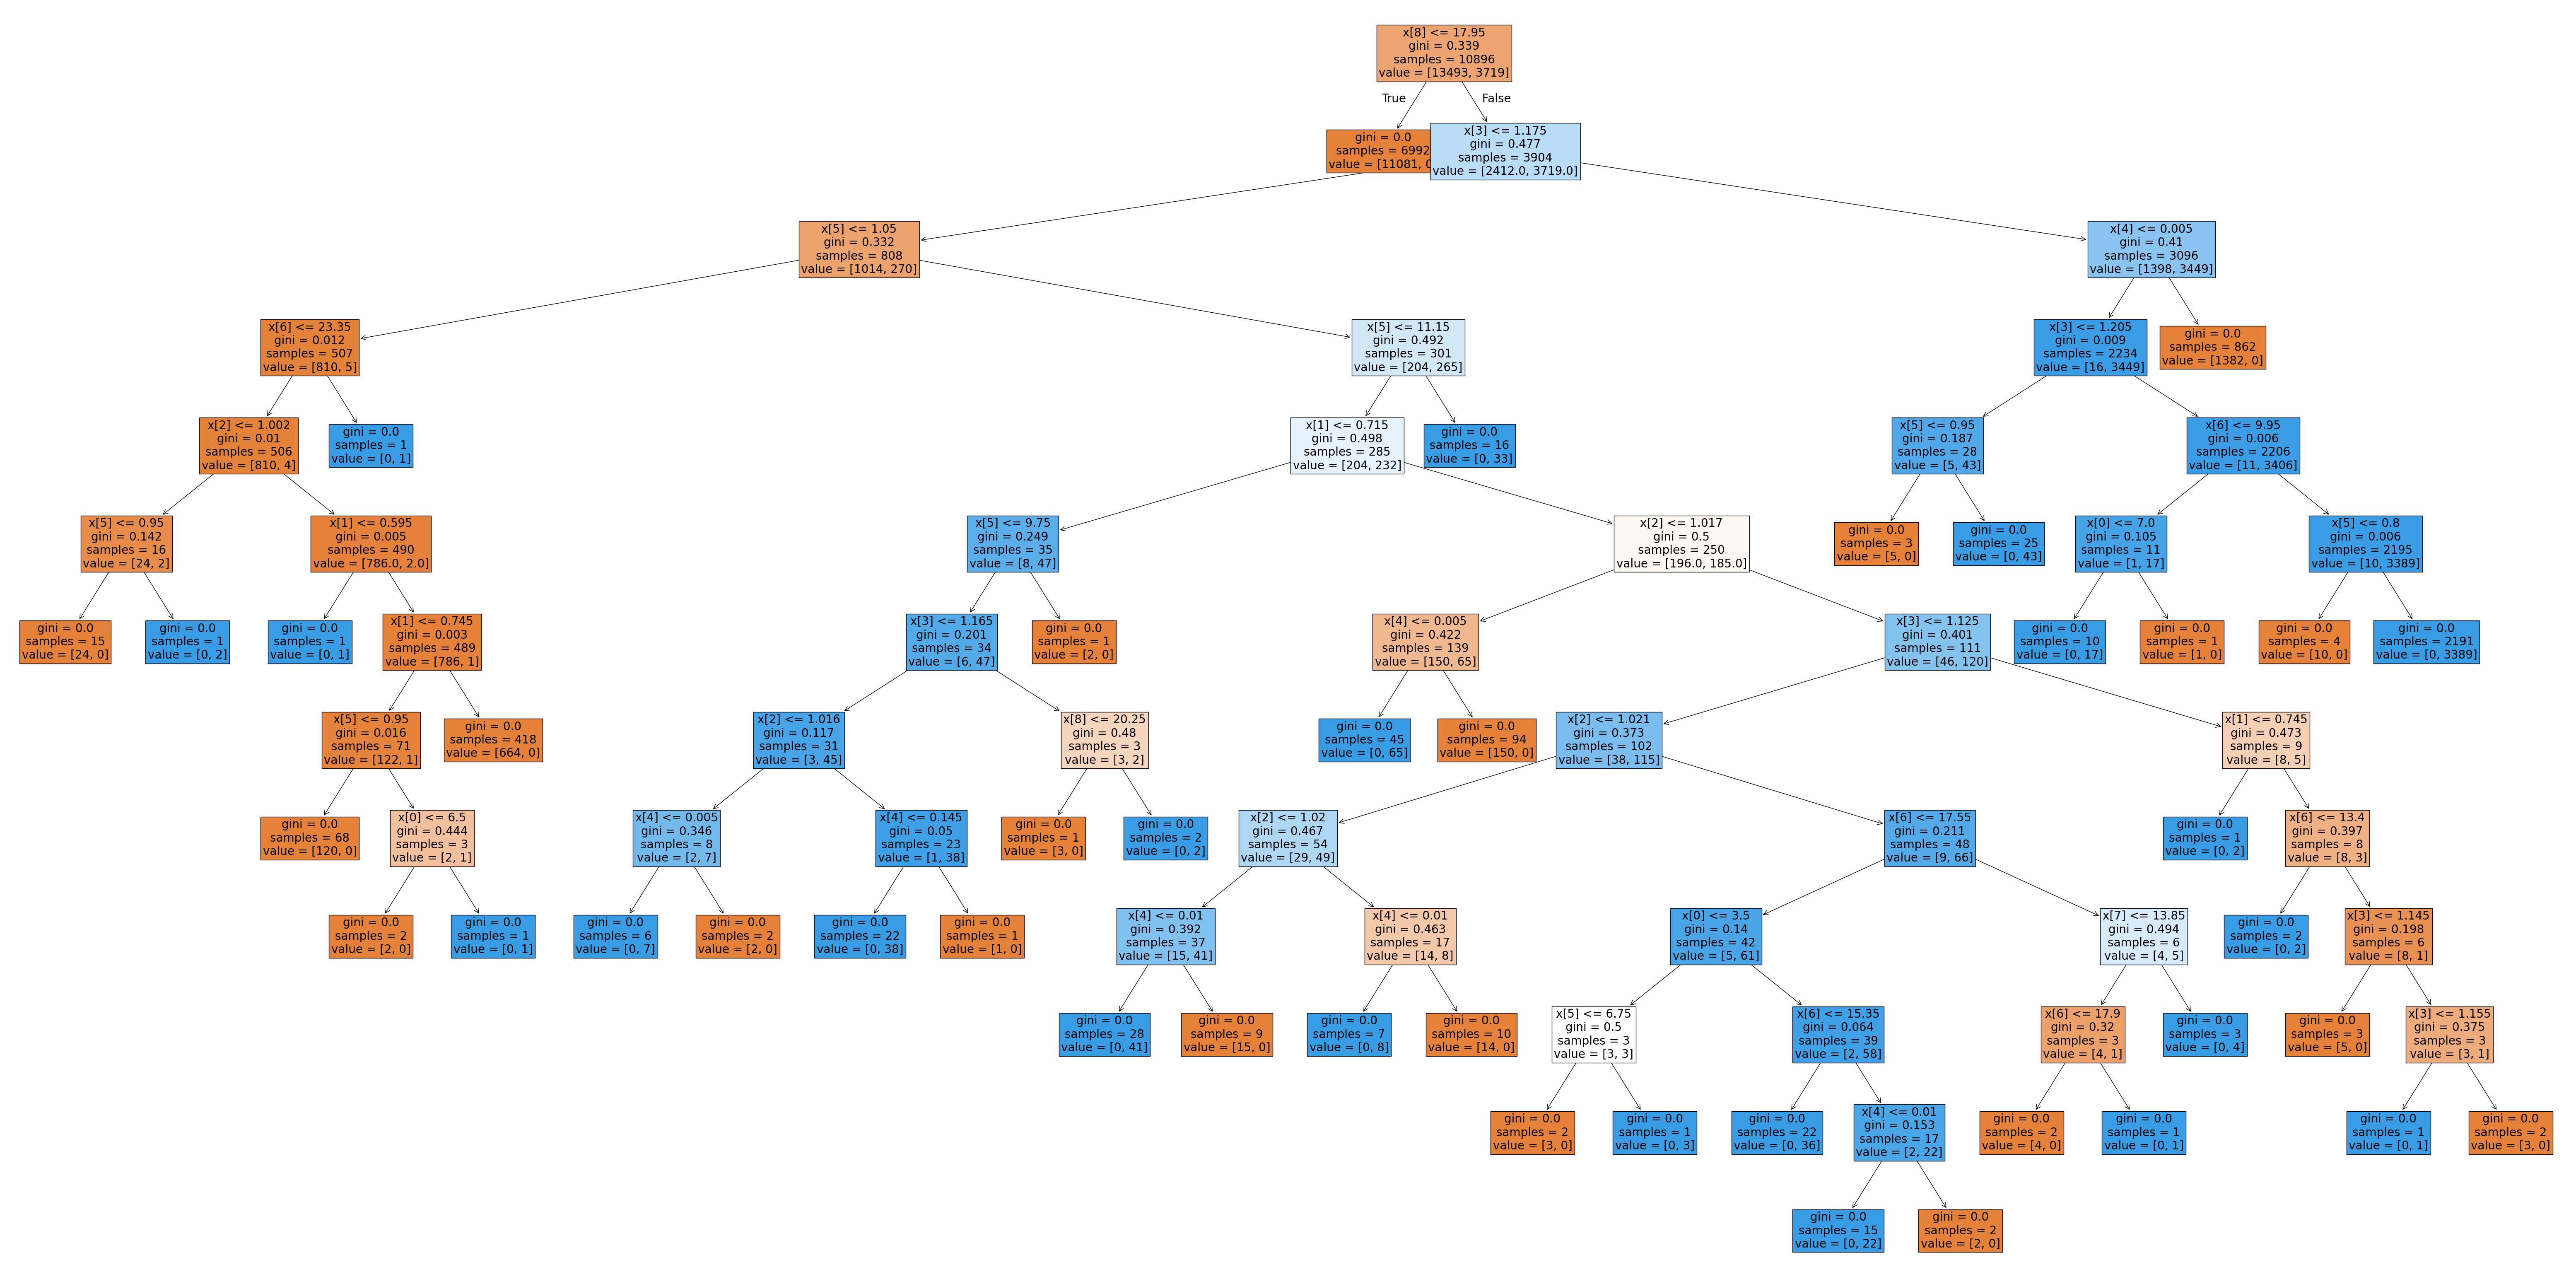

In [42]:
# Class-names = {0:'Unpleasant Weather', 1:'Pleasant Weather'}

fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[8], fontsize = 20, filled=True);

In [37]:
fig.savefig(os.path.join(path, '04 Analysis', 'belgrade_forest_2010s.png'),bbox_inches='tight')

## 06 Uncovering Feature Importances

In [43]:
# Retrieve feature importances from the trained model

newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.01284395, 0.02889986, 0.02166916, 0.11054316, 0.29730645,
       0.07580241, 0.09204948, 0.01617109, 0.34471444])

In [45]:
#Create list of weather parameters

w_list = [feature.replace('HEATHROW_', '') for feature in X_heath]
w_list

['cloud_cover',
 'humidity',
 'pressure',
 'global_radiation',
 'precipitation',
 'sunshine',
 'temp_mean',
 'temp_min',
 'temp_max']

In [46]:
important = pd.Series(newarray, index = X_heath)
important

HEATHROW_cloud_cover         0.012844
HEATHROW_humidity            0.028900
HEATHROW_pressure            0.021669
HEATHROW_global_radiation    0.110543
HEATHROW_precipitation       0.297306
HEATHROW_sunshine            0.075802
HEATHROW_temp_mean           0.092049
HEATHROW_temp_min            0.016171
HEATHROW_temp_max            0.344714
dtype: float64

['cloud_cover', 'humidity', 'pressure', 'global_radiation', 'precipitation', 'sunshine', 'temp_mean', 'temp_min', 'temp_max']


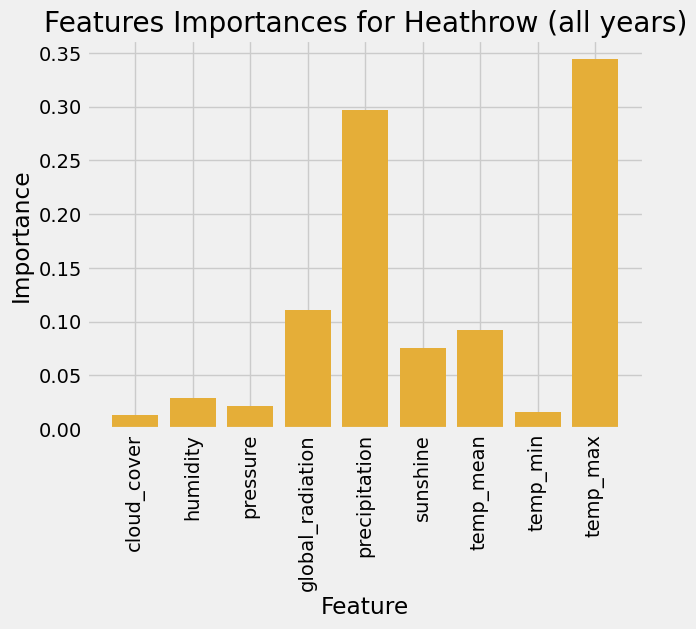

In [49]:
# Plot the results

%matplotlib inline

plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(newarray)))
print(w_list)

plt.bar(x_values, newarray, orientation = 'vertical')
plt.xticks(x_values, w_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Feature'); plt.title('Features Importances for Heathrow (all years)');

plt.savefig(os.path.join(path, '04 Analysis', 'Heath_importances.png'), bbox_inches='tight')
plt.show()